# Figure 18

In [1]:
# Import necessary libraries
from __future__ import division, print_function, unicode_literals

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
import numpy as np
from functools import partial
import glob, os
import pickle
import copy
from PDEsolvers import KS_Periodic

In [2]:
# User inputs
data_train_len = 20  # Number of training data files
data_name = 'KS_Eqn_exp5'  # Prefix of data files
folder_name = 'KS_exp5h/'  # Folder to be created for saved output

In [3]:
# Find the model with lowest validation error
import math

def BestErrorFile(folder_name):

    filename_best = ''
    best_error = 10**6

    current_dir = os.getcwd()
    os.chdir("./" + folder_name)
    for file in glob.glob("*.pkl"):
        with open(file, 'rb') as f:
            params = pickle.load(f)
            if not math.isnan(params['minRegTest']):
                if params['minRegTest'] < best_error:
                    filename_best = file
                    best_error = params['minRegTest']
    os.chdir(current_dir)

    return filename_best

In [4]:
import helperfns

# Best full width networks
folder_name_list = ['KS_exp5f/','KS_exp6i/','KS_exp7g/','KS_exp4f/']

full_width_predloss = np.zeros(4)
for ind in range(4):
    folder_name = folder_name_list[ind]
    pkl_file = folder_name + BestErrorFile(folder_name)

    with open(pkl_file, 'rb') as f:
         params = pickle.load(f)
    
    data_name = params['data_name'] 
    data_test1 = np.load(('./data/%s_test1_x.npy' % data_name))
    data_test2 = np.load(('./data/%s_test2_x.npy' % data_name))
    data_test3 = np.load(('./data/%s_test3_x.npy' % data_name))
    data_test4 = np.load(('./data/%s_test4_x.npy' % data_name))
    data_test5 = np.load(('./data/%s_test5_x.npy' % data_name))
    data_test_all = np.vstack([data_test1,data_test2,data_test3,data_test4,data_test5])
    
    max_shifts_to_stack = helperfns.num_shifts_in_stack(params)
    data_test_all_tensor = helperfns.stack_data(data_test_all, max_shifts_to_stack, params['val_len_time'])
    
    tf.reset_default_graph()

    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(params['model_path']+'.meta')
        saver.restore(sess, params['model_path'])
    
        pred_loss = sess.run("loss2:0", feed_dict={"x:0": data_test_all_tensor})
        print(pred_loss)
        full_width_predloss[ind] = pred_loss
    

INFO:tensorflow:Restoring parameters from ./KS_exp5f/KS_Eqn_exp5_2019_10_16_13_17_10_923832_model.ckpt
0.0047629476
INFO:tensorflow:Restoring parameters from ./KS_exp6i/KS_Eqn_exp6_2019_10_19_20_18_32_846738_model.ckpt
0.024210492
INFO:tensorflow:Restoring parameters from ./KS_exp7g/KS_Eqn_exp7_2019_10_21_07_37_53_340646_model.ckpt
0.14672409
INFO:tensorflow:Restoring parameters from ./KS_exp4f/KS_Eqn_exp4_2019_10_23_18_52_14_520335_model.ckpt
0.4687274


In [5]:
# Best reduced width networks
folder_name_list = ['KS_exp5h/','KS_exp6j/','KS_exp7h/','KS_exp4e/']

reduced_width_predloss = np.zeros(4)
for ind in range(4):
    folder_name = folder_name_list[ind]
    pkl_file = folder_name + BestErrorFile(folder_name)

    with open(pkl_file, 'rb') as f:
         params = pickle.load(f)
            
    data_name = params['data_name']  
    data_test1 = np.load(('./data/%s_test1_x.npy' % data_name))
    data_test2 = np.load(('./data/%s_test2_x.npy' % data_name))
    data_test3 = np.load(('./data/%s_test3_x.npy' % data_name))
    data_test4 = np.load(('./data/%s_test4_x.npy' % data_name))
    data_test5 = np.load(('./data/%s_test5_x.npy' % data_name))
    data_test_all = np.vstack([data_test1,data_test2,data_test3,data_test4,data_test5])
    
    max_shifts_to_stack = helperfns.num_shifts_in_stack(params)
    data_test_all_tensor = helperfns.stack_data(data_test_all, max_shifts_to_stack, params['val_len_time'])    
    
    tf.reset_default_graph()

    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(params['model_path']+'.meta')
        saver.restore(sess, params['model_path'])
    
        pred_loss = sess.run("loss2:0", feed_dict={"x:0": data_test_all_tensor})
        print(pred_loss)
        reduced_width_predloss[ind] = pred_loss

INFO:tensorflow:Restoring parameters from ./KS_exp5h/KS_Eqn_exp5_2019_10_18_07_18_03_991009_model.ckpt
0.008977019
INFO:tensorflow:Restoring parameters from ./KS_exp6j/KS_Eqn_exp6_2019_10_19_20_13_17_886212_model.ckpt
0.022841832
INFO:tensorflow:Restoring parameters from ./KS_exp7h/KS_Eqn_exp7_2019_10_20_05_52_19_528113_model.ckpt
0.13391751
INFO:tensorflow:Restoring parameters from ./KS_exp4e/KS_Eqn_exp4_2019_10_22_18_18_45_259709_model.ckpt
0.46454412


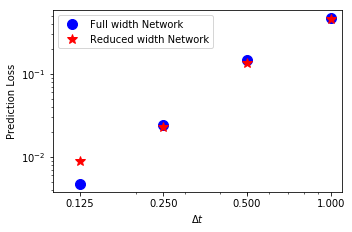

In [6]:
dt_array = np.array([0.125, 0.25,0.5,1])

plt.figure(figsize=(5,3.33))
Full, = plt.plot(dt_array,full_width_predloss,'ob',markersize=10)
Reduced, = plt.plot(dt_array,reduced_width_predloss,'*r',markersize=10)
plt.xscale('log')
plt.yscale('log')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.xticks([0.125,0.25,0.5,1.0,2])
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(0.1,1.1)
plt.xlabel('$\Delta t$')
plt.ylabel('Prediction Loss')
plt.legend([Full,Reduced],['Full width Network','Reduced width Network'],fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
print(full_width_predloss)
print(reduced_width_predloss)

[0.00476295 0.02421049 0.14672409 0.46872741]
[0.00897702 0.02284183 0.13391751 0.46454412]
